## FYS-STK4155 
## Project 2 - Logistic Regression


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import os

import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error
from sklearn import datasets

from mylearn.linear_model import LinearRegression, RidgeRegression, GDRegressor
from mylearn.logisticreg import MultiClassLogisticRegression, sklearnmethod
from mylearn.ml_tools import *
from mylearn.project_tools import fig_path

from imageio import imread
from numpy.random import normal, uniform

import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})

# Set fontsizes in figures
params = {'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=False)

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)

#import the digits dataset
digits = datasets.load_digits()

inputs = digits.images
labels = digits.target

#flatten the image
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)


#split into test and train
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, train_size=0.8, test_size=0.2)

In [3]:
#testing multiclass logistic regression on the digit datasets, without regularization parameter
lr = MultiClassLogisticRegression()
lr.fit(X_train, y_train, epochs=1000, M = 128, eta = 0.001)
y_pred = lr.predict_classes(X_test)
print(lr.accuracy(X_test, y_test))

0.9583333333333334


In [4]:
#testing multiclass logistic regression on the digits datasets, with regularization parameter
lr_ridge = MultiClassLogisticRegression()
lr_ridge.fit(X_train, y_train, epochs=1000, M = 128, eta=0.001, lamb = 0.001)
y_pred = lr_ridge.predict_classes(X_test)
print(lr_ridge.accuracy(X_test, y_test))

0.9611111111111111


In [5]:
#See how the number of epochs affects the accuray score
epochs = np.linspace(10, 1000, 100)
acc = []

for epoch in epochs:
    lr = MultiClassLogisticRegression()
    lr.fit(X_train, y_train, int(epoch))
    y_pred = lr.predict_classes(X_test)
    acc.append(lr.accuracy(X_test, y_test))

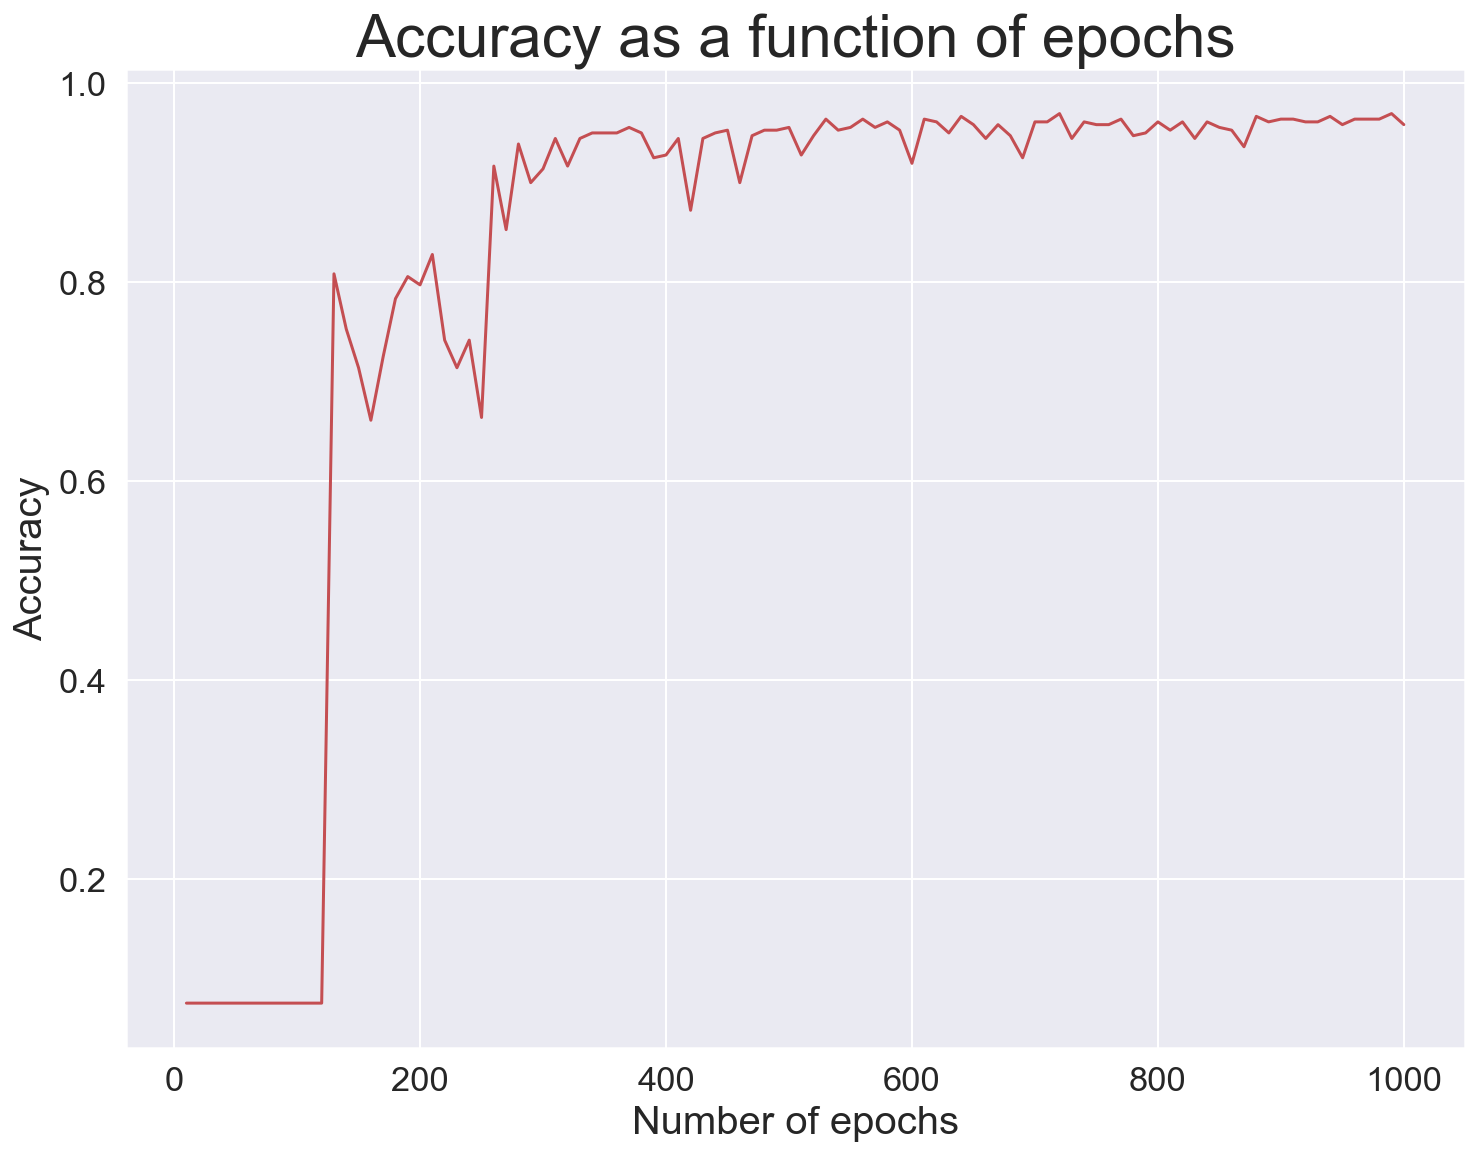

In [6]:
fig, ax = plt.subplots()
ax.plot(epochs, acc, 'r')
ax.set_title('Accuracy as a function of epochs', fontsize=30)
ax.set_xlabel('Number of epochs', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
fig.savefig('epochs.png')

In [7]:
#see how accuracy changes with lambda
lmbda = [0.000005, 0.00001, 0.00005,  0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
acc = []

for l in lmbda:
    lr = MultiClassLogisticRegression()
    lr.fit(X_train, y_train, epochs=1000, M=128, eta=0.001, lamb=l)
    y_pred = lr.predict_classes(X_test)
    acc.append(lr.accuracy(X_test, y_test))

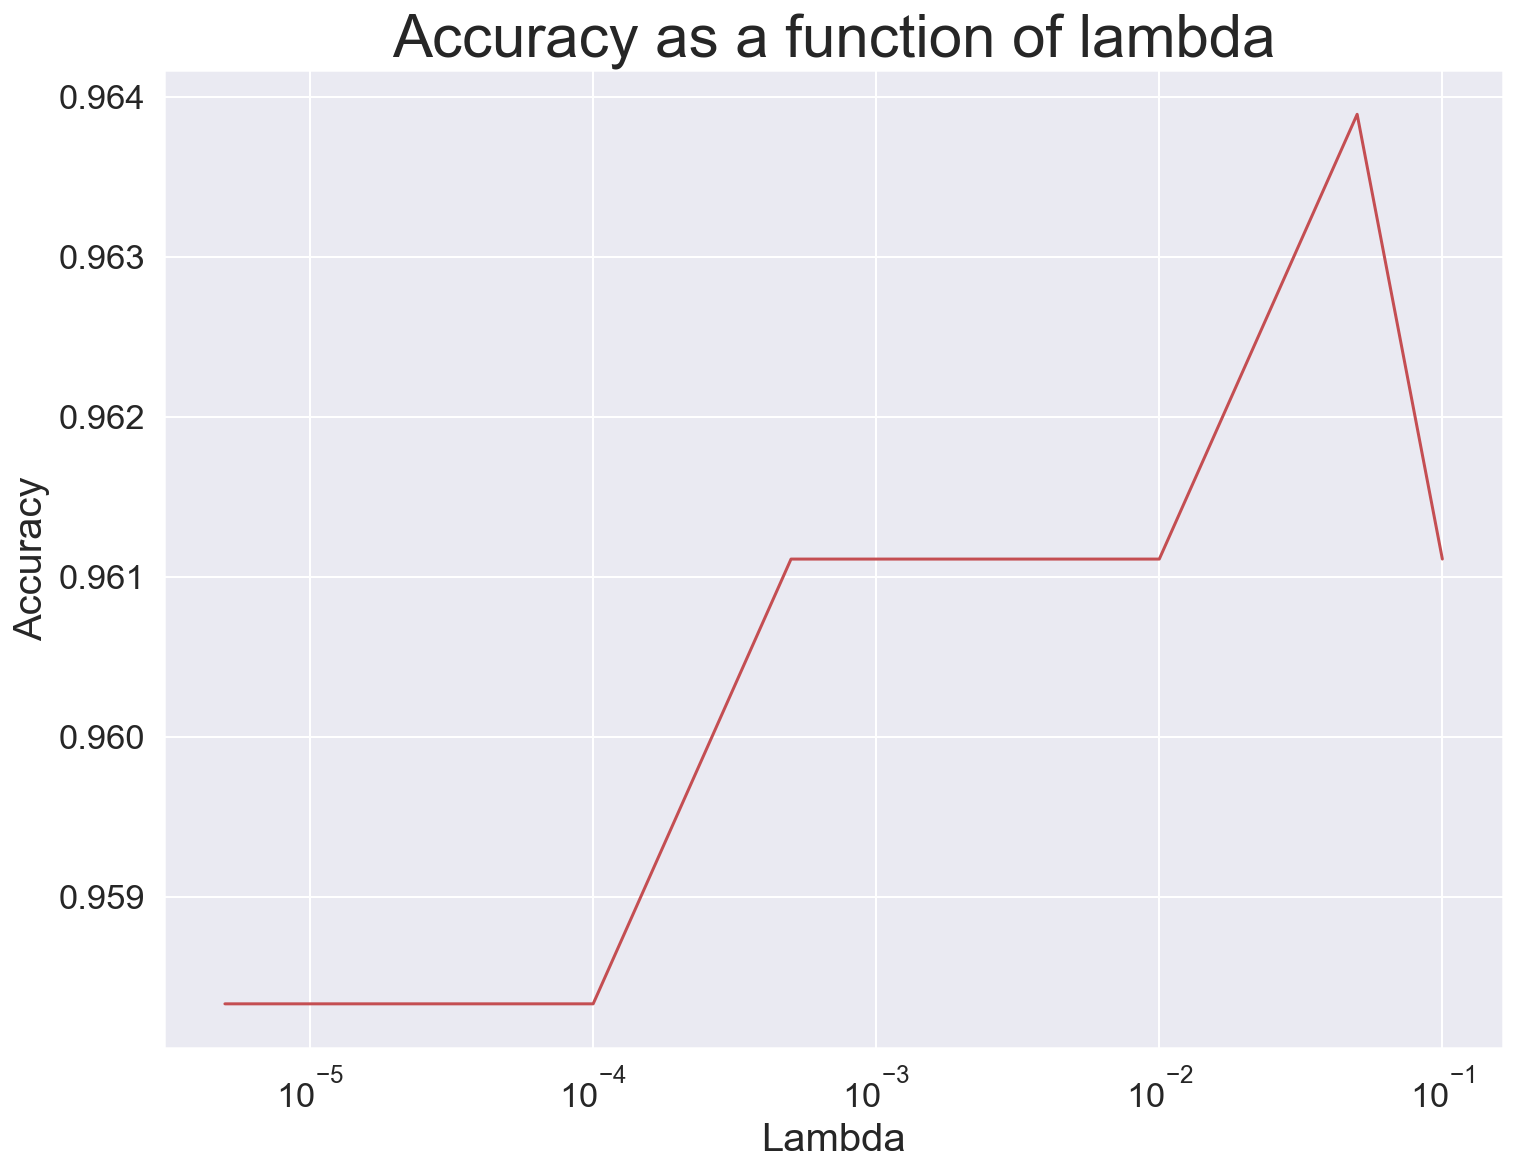

In [8]:
fig, ax = plt.subplots()
ax.plot(lmbda, acc, 'r')
ax.set_title('Accuracy as a function of lambda', fontsize=30)
ax.set_xlabel('Lambda', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_xscale('log')
fig.savefig('lambda.png')

In [9]:
best_lambda = lmbda[np.argmax(acc)]
best_lambda

0.05

In [10]:
lr = MultiClassLogisticRegression()
lr.fit(X_train, y_train, epochs=1000, M = 128, eta = 0.001, lamb=0.005)
print(lr.accuracy(X_test, y_test))

0.9611111111111111


In [11]:
acc = np.zeros((11, 11))
epochs = np.linspace(400, 2000, 11)
lmbda = [0.0000005, 0.000001, 0.000005, 0.00001, 0.00005,  0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
for i, epoch in enumerate(epochs):
    for j, l in enumerate(lmbda):
        lr = MultiClassLogisticRegression()
        lr.fit(X_train, y_train, epochs=int(epoch), M=128, eta=0.001, lamb=l)
        y_pred = lr.predict_classes(X_test)
        acc[i, j] = lr.accuracy(X_test, y_test)
    percentage = (i+1)*len(epochs)/10
    print('%g ' % percentage, '%')


1.1  %
2.2  %
3.3  %
4.4  %
5.5  %
6.6  %
7.7  %
8.8  %
9.9  %
11  %
12.1  %


[5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]


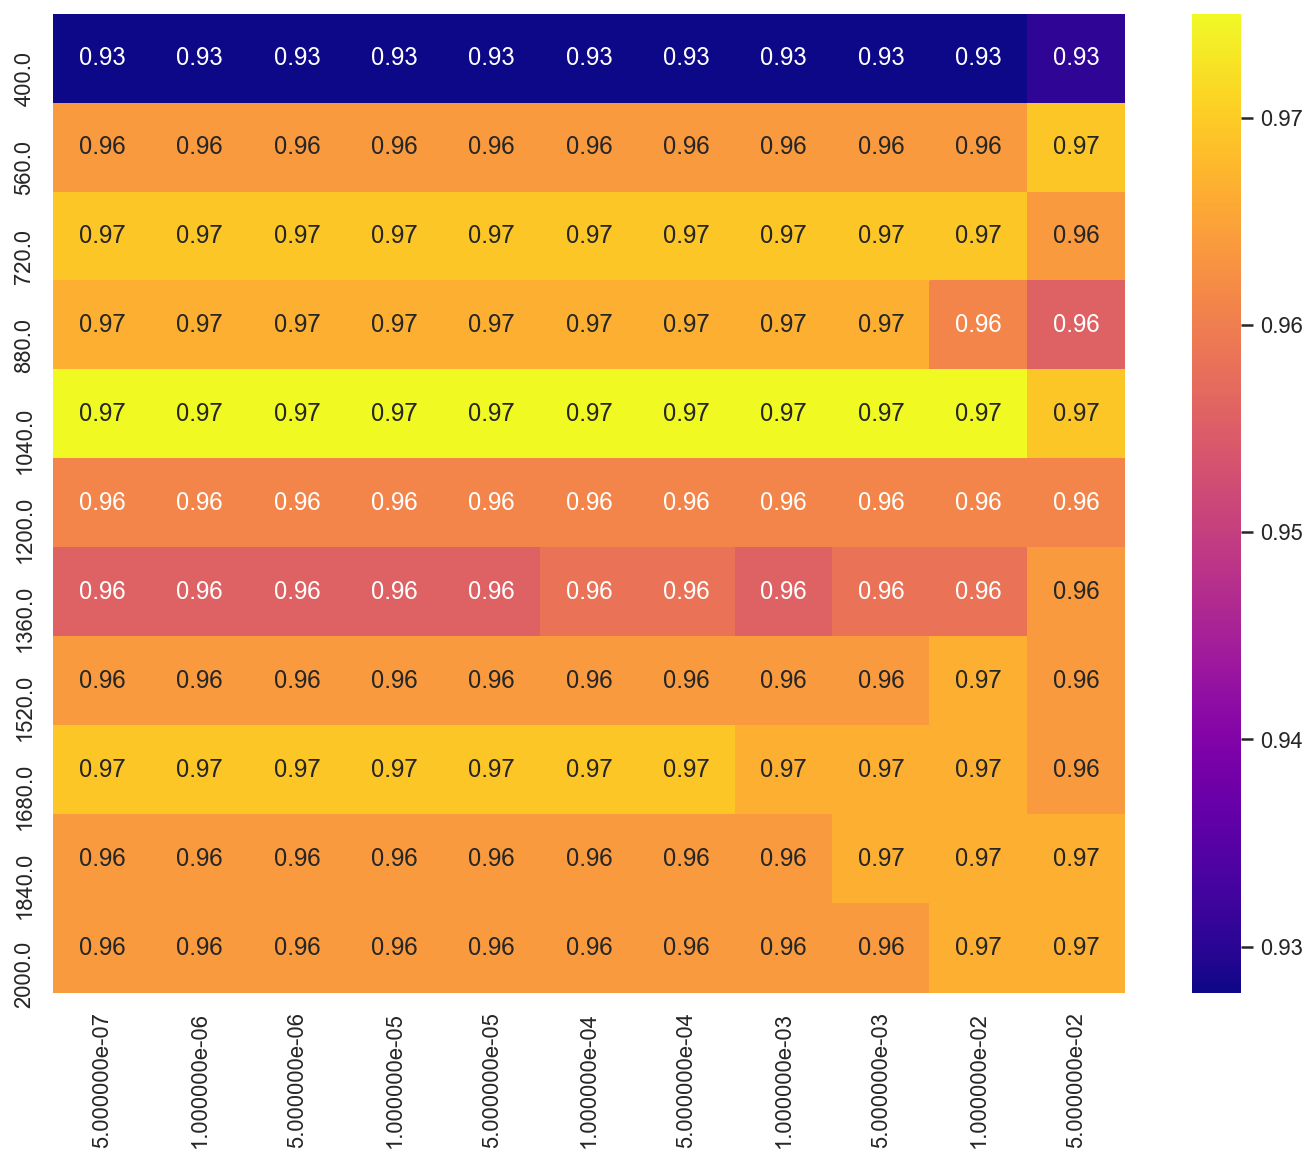

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
lmbda2 = ["%e" % i for i in lmbda]
print(lmbda)
acc_df = pd.DataFrame(acc, index=epochs, columns=lmbda2)
fig, ax = plt.subplots()
ax = sns.heatmap(acc_df, annot = True, cmap='plasma')
fig.savefig("heatmap.png")

In [15]:
sklearnmethod(X_train, X_test, y_train, y_test)

Test set accuracy with Logistic Regression: 0.95556
Test set accuracy Logistic Regression with scaled data: 0.96


In [16]:
lr = MultiClassLogisticRegression()
lr.fit(X_train, y_train, epochs=1000, M = 128, eta = 0.001, lamb=best_lambda)
print(lr.accuracy(X_test, y_test))

0.9638888888888889
